In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder,OrdinalEncoder
from mixed_naive_bayes import  MixedNB
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
from feature_engine.outliers import Winsorizer


In [123]:
df = pd.read_csv("C:\\Users\\PERSONAL\\Downloads\\Placement_Data.csv")

In [124]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [66]:
#df['status'] = df[df['status'] != "Not Placed"]['salary'].plot(kind = 'hist')

In [125]:
df['status'].isna().sum()

0

### Columns Overview:
	Sl_no.: Candidate serial number
	Gender: Gender of the candidate
	Ssc_p: Percentage of marks in Secondary Education/ 10th
	ssc_b: Board of Secondary education - Central/Others
	Hsc_p:  Percentage of marks in Higher Secondary Education/ 12th
	hsc_b: Board of Higher Secondary Education - Central/Others
	hsc_s: Specialization in Higher Secondary Education/12th
	Degree_p:  Percentage of marks in Degree
	Degree_t: Undergraduation type/ Field of degree education
	workex: Any previous experience
	Etest_p: Employability test percentage
	specialisation: Post Graduation(MBA) specialization
	Mba_p: Percentage of marks in MBA
	Status: Candidate placed or not, Target variable
	Salary: If placed, what is the salary offered by the company to the candidate


In [126]:
df.shape

(215, 15)

In [127]:
df.drop('sl_no',axis = 1,inplace = True)

In [70]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [165]:
df    #0,2,4,5,7,8,10,12

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### datatypes

In [9]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

### Missing values

In [10]:
df.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

### Duplicates

In [168]:
df.duplicated().sum()

0

### Outliers

<Axes: xlabel='salary'>

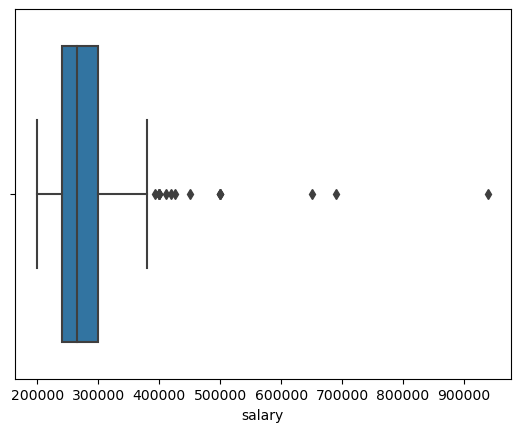

In [128]:
sns.boxplot(data = df ,x = 'salary')

In [131]:
df['salary'] = df['salary'].fillna(0)

### Outliers  treatement with winsorization

In [132]:
from feature_engine.outliers import Winsorizer

<Axes: >

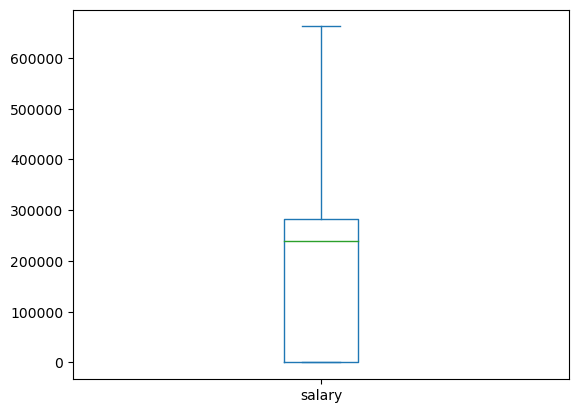

In [133]:
winsor = Winsorizer(capping_method = 'gaussian',
                    tail = 'both',
                    fold = 3 )
winsor.fit(df[['salary']])
mad = winsor.transform(df[['salary']])
mad.plot(kind = 'box')

In [42]:
!pip install feature_engine

### Zero variance check

In [74]:
from sklearn .feature_selection import VarianceThreshold

In [75]:
var = VarianceThreshold(threshold=0.0)

In [76]:
var.fit_transform(df.select_dtypes(include = ['float64','int64']))

array([[6.700e+01, 9.100e+01, 5.800e+01, 5.500e+01, 5.880e+01, 2.700e+05],
       [7.933e+01, 7.833e+01, 7.748e+01, 8.650e+01, 6.628e+01, 2.000e+05],
       [6.500e+01, 6.800e+01, 6.400e+01, 7.500e+01, 5.780e+01, 2.500e+05],
       ...,
       [6.700e+01, 6.700e+01, 7.300e+01, 5.900e+01, 6.972e+01, 2.950e+05],
       [7.400e+01, 6.600e+01, 5.800e+01, 7.000e+01, 6.023e+01, 2.040e+05],
       [6.200e+01, 5.800e+01, 5.300e+01, 8.900e+01, 6.022e+01, 0.000e+00]])

In [77]:
var.fit_transform(df.select_dtypes(include = ['float64','int64'])),var.get_feature_names_out()

(array([[6.700e+01, 9.100e+01, 5.800e+01, 5.500e+01, 5.880e+01, 2.700e+05],
        [7.933e+01, 7.833e+01, 7.748e+01, 8.650e+01, 6.628e+01, 2.000e+05],
        [6.500e+01, 6.800e+01, 6.400e+01, 7.500e+01, 5.780e+01, 2.500e+05],
        ...,
        [6.700e+01, 6.700e+01, 7.300e+01, 5.900e+01, 6.972e+01, 2.950e+05],
        [7.400e+01, 6.600e+01, 5.800e+01, 7.000e+01, 6.023e+01, 2.040e+05],
        [6.200e+01, 5.800e+01, 5.300e+01, 8.900e+01, 6.022e+01, 0.000e+00]]),
 array(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'],
       dtype=object))

In [78]:
pd.DataFrame (var.fit_transform(df.select_dtypes(include = ['float64','int64'])),columns = var.get_feature_names_out())

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
3,56.00,52.00,52.00,66.0,59.43,0.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0
213,74.00,66.00,58.00,70.0,60.23,204000.0


In [83]:
!pip install feature_engine

### univariate analsis

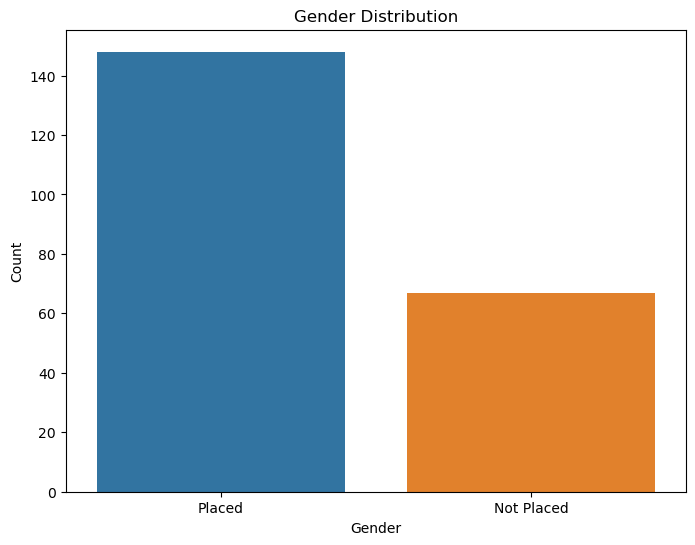

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='status', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


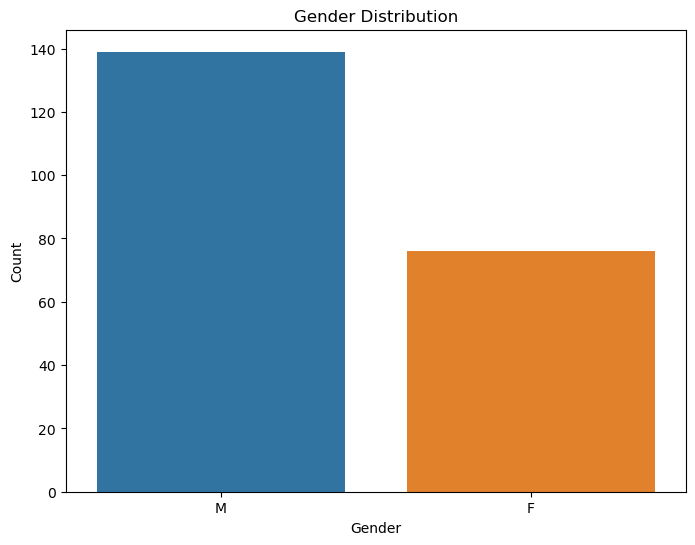

In [134]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There are more no of males in the data

In [135]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

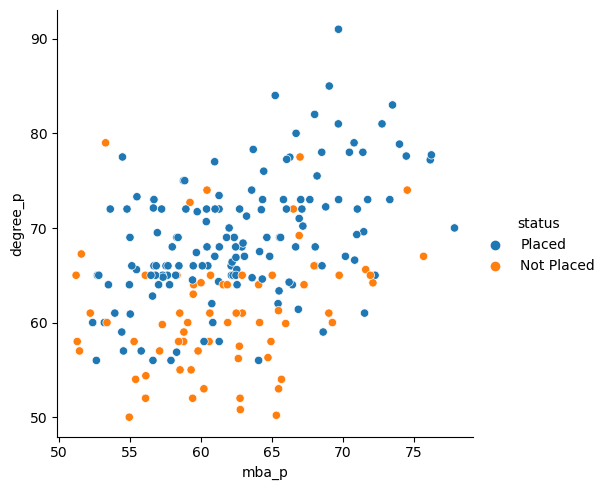

In [136]:
sns.relplot(
    data=df,
    x="mba_p", y="degree_p", 
    hue="status"
)

Based on degree percentage and mba percentage  many are placed few are not placed

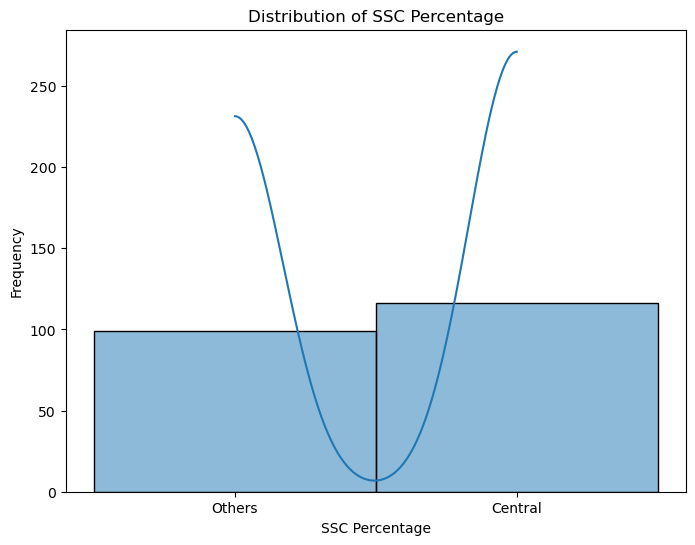

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ssc_b'], bins=20, kde=True)
plt.title('Distribution of SSC Percentage')
plt.xlabel('SSC Percentage')
plt.ylabel('Frequency')
plt.show()

students mostly enrolled in central in ssc_b

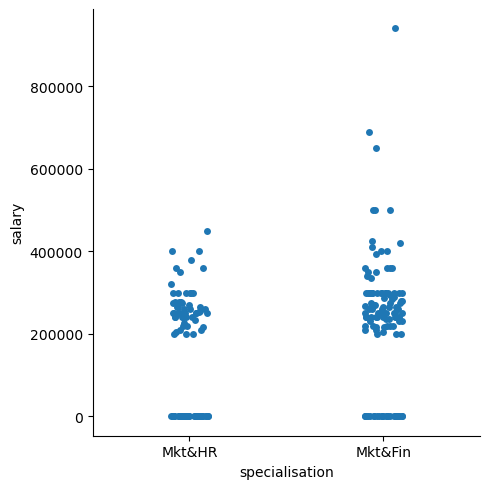

In [45]:
sns.catplot(data=df, x="specialisation", y="salary")

Those who have entrolled in Marketing and finance(MKT&FT) have got high pachages than MKT&HR

C:\Users\PERSONAL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PERSONAL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\PERSONAL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


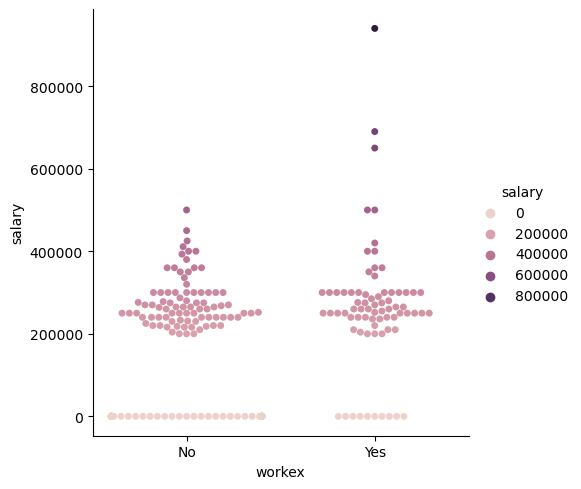

In [46]:
sns.catplot(data=df, x="workex", y="salary", hue="salary", kind="swarm")


 with work experience students got high packages

C:\Users\PERSONAL\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\PERSONAL\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


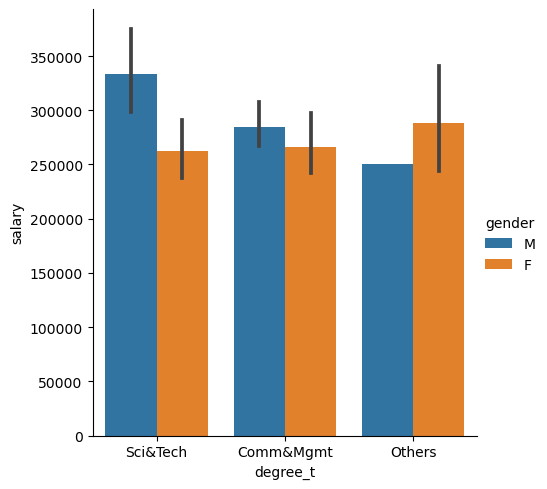

In [49]:
sns.catplot(data=df, x="degree_t", y="salary", hue="gender", kind="bar")

There are more no of males are present in sci&Tech field and there are equally balanced in other fields

### Relationship check

### continuous vs continuous

In [189]:
df.corr()

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_14172\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_14172\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

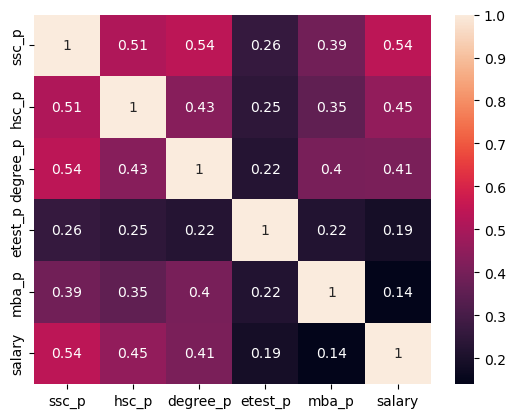

In [190]:
sns.heatmap(df.corr(),annot = True)

### Splitting the data

In [137]:
X= df.drop('status',axis = 1)
y = df['status']


In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [148]:
cat_col = X_train.select_dtypes(include = 'object').columns
num_col = X_train.select_dtypes(exclude = 'object').columns

In [149]:
cat_col

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation'],
      dtype='object')

In [150]:
num_col

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [151]:
ordinal = OrdinalEncoder()

In [152]:
ordinal.fit(X_train[cat_col])

OrdinalEncoder()

In [153]:
X_train[cat_col] = ordinal.transform(X_train[cat_col])

In [154]:
X_test[cat_col] = ordinal.transform(X_test[cat_col])

In [155]:
X_train[cat_col]

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
198,0.0,0.0,0.0,1.0,1.0,0.0,1.0
82,1.0,0.0,0.0,1.0,0.0,0.0,0.0
65,1.0,1.0,1.0,2.0,0.0,0.0,1.0
109,1.0,0.0,1.0,2.0,2.0,1.0,1.0
182,1.0,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
106,1.0,1.0,1.0,2.0,2.0,0.0,0.0
14,1.0,0.0,0.0,1.0,0.0,0.0,1.0
92,0.0,0.0,0.0,2.0,0.0,0.0,0.0
179,0.0,0.0,0.0,2.0,2.0,0.0,1.0


In [156]:
mnb = MixedNB(categorical_features = [0,2,4,5,7,8,10])

In [157]:
mnb = MixedNB(categorical_features = [0,2,4,5,7,8,10])

In [158]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [159]:
y_train = le.transform(y_train)

In [160]:
mnb.fit(X_train,y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [161]:
y_pred = mnb.predict(X_test)

In [162]:
accuracy_score(le.transform(y_test),y_pred)

1.0

In [163]:
print(classification_report(le.transform(y_test),y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        44

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



In [164]:
confusion_matrix(le.transform(y_test),y_pred)

array([[21,  0],
       [ 0, 44]], dtype=int64)

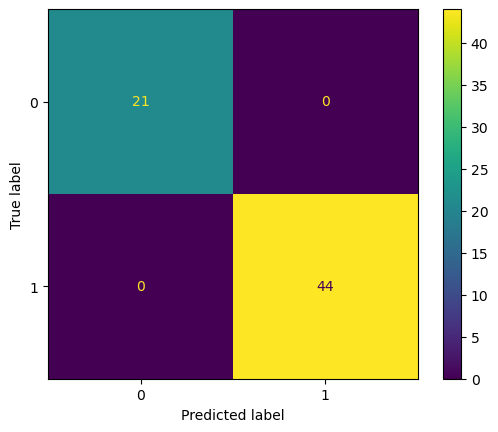

In [165]:
ConfusionMatrixDisplay(confusion_matrix(le.transform(y_test),y_pred)).plot()